In [1]:
#The aim of this project is to analyse movie dataset between 1980-2020 and find out the correlation factors that affect gross earnings

#import libraries
import pandas as pd
from abc_analysis import abc_analysis 
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.mlab as mlab
import re
from dateutil.parser import parse
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts the size of the plots

# Read the data

df= pd.read_csv('E:\portfolio projects\Project 5 Python Movie Data analysis\movies.csv')

In [2]:
# Printing the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#Checking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:

df.shape


(7668, 15)

In [5]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
#filling values with previous values
#df2 = df.fillna(method= 'pad')
#df2.drop(df2.index[:], inplace=True)
df2 = df.fillna({'budget': df['budget'].interpolate(method='linear'),
                'gross': df['gross'].interpolate(method='linear'),
                 'score': df['score'].median(),
                 'votes': df['votes'].median(),
                'runtime': df['runtime'].median(),
                'year': df['year'].median(),
               'rating' : 'R',
                 'country' : 'United States'
                })
df2 = df2.fillna(method = 'pad')
df2.isnull().sum()


name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [7]:
for col in df2.columns:
    pct_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [8]:
#sns.boxplot(df.budget)
#sns.boxplot(df2.budget)
#df2.to_csv('E:\portfolio projects\Project 5 Python Movie Data analysis\movies2.csv')

In [9]:
df2.dtypes.sort_index()

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime     float64
score       float64
star         object
votes       float64
writer       object
year          int64
dtype: object

In [10]:
#changing datatype for column

df2['budget'] = df2['budget'].astype('int64')
df2['gross'] = df2['gross'].astype('int64')
df2

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,13266,Dow Jazz Films,90.0
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,32875,13266,Cactus Blue Entertainment,90.0
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,13266,Embi Productions,104.0
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",6.5,33000.0,James Randall,James Randall,Christina Roz,United States,15000,13266,Embi Productions,120.0


In [11]:
#Creating a new column to fetch correct release year from 'released'
#df2['yearcorrect'] = df2['released'].astype(str).split[',',]
#df2['yearcorrect'] = df2['released'].astype(str).str.split(', ').apply(lambda x: x[-1][0:4])
#data['year'] = data['y'].apply(lambda x: x[-1])
df2['yearcorrect'] = df2['year'].astype(str)
df2.dtypes.sort_index()

budget           int64
company         object
country         object
director        object
genre           object
gross            int64
name            object
rating          object
released        object
runtime        float64
score          float64
star            object
votes          float64
writer          object
year             int64
yearcorrect     object
dtype: object

In [12]:
df2.to_csv('E:\portfolio projects\Project 5 Python Movie Data analysis\movies2.csv')

In [13]:

#parse(df['released'][3000], fuzzy=True).year

#df2['yearcorrect'] = df['released'].apply(lambda x: (parse(df['released'][x], fuzzy=True).year))
#for i in df['released'].index:
#    df2['yearcorrect'] = parse(df['released'][x], fuzzy=True).year for x in df['released']



In [14]:
#ran succesfully even though gave type error
for i in df['released'].index:
    
    try:
        df2['yearcorrect'][i] = (parse(df['released'][i], fuzzy=True).year)
    except TypeError:
        pass

In [15]:
#df2['yearcorrect'] = df['released'].apply( lambda a: re.search("([0-9]{4})", df['released'][a])[0])
#df2['yearcorrect'] =  df['released'].apply(lambda x: re.sub('([0-9]{4})',re.search("([0-9]{4})", str(df['released'][6000]))[0], str(x)))
#df2['yearcorrect']


#df2.drop(['yearcorrect'], axis=1, inplace=True)


#df2['yearcorrect'] = df['released'].apply(lambda x: (parse(df['released'][x], fuzzy=True).year))


In [16]:
df2


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,13266,Dow Jazz Films,90.0,2020
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,32875,13266,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,13266,Embi Productions,104.0,2020
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",6.5,33000.0,James Randall,James Randall,Christina Roz,United States,15000,13266,Embi Productions,120.0,2020


In [17]:
df2.isnull().sum()
df2.dtypes.sort_index()

budget           int64
company         object
country         object
director        object
genre           object
gross            int64
name            object
rating          object
released        object
runtime        float64
score          float64
star            object
votes          float64
writer          object
year             int64
yearcorrect     object
dtype: object

In [18]:
df2.to_csv('E:\portfolio projects\Project 5 Python Movie Data analysis\movies2.csv')

In [19]:
#setting df to new fixed datasource
df= pd.read_csv('E:\portfolio projects\Project 5 Python Movie Data analysis\movies2.csv', index_col=0)

In [20]:
df


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,13266,Dow Jazz Films,90.0,2020
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,32875,13266,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,13266,Embi Productions,104.0,2020
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",6.5,33000.0,James Randall,James Randall,Christina Roz,United States,15000,13266,Embi Productions,120.0,2020


In [21]:
df.isnull().sum()


name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget         0
gross          0
company        0
runtime        0
yearcorrect    0
dtype: int64

In [22]:
pd.set_option('display.max_rows',20)
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,22500000,1400,British Broadcasting Corporation (BBC),103.0,2001
7625,The Untold Story,R,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,69133333,790,Visual Arts Entertainment,104.0,2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,17250000,682,Roxwell Films,93.0,2020
2417,Madadayo,R,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


In [23]:
#show any duplicates by column
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
5813                        10 West Studios
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2385, dtype: object

In [24]:
#drop any duplicates across the dataframe
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,13266,Dow Jazz Films,90.0,2020
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,32875,13266,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,13266,Embi Productions,104.0,2020
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",6.5,33000.0,James Randall,James Randall,Christina Roz,United States,15000,13266,Embi Productions,120.0,2020


In [25]:
#Finding correlation b/w budget and revenue
#Finding correlation b/w big production and revenue

In [26]:
#sorting dataframe
df=df.sort_values(by=['gross'], inplace=False, ascending=False)

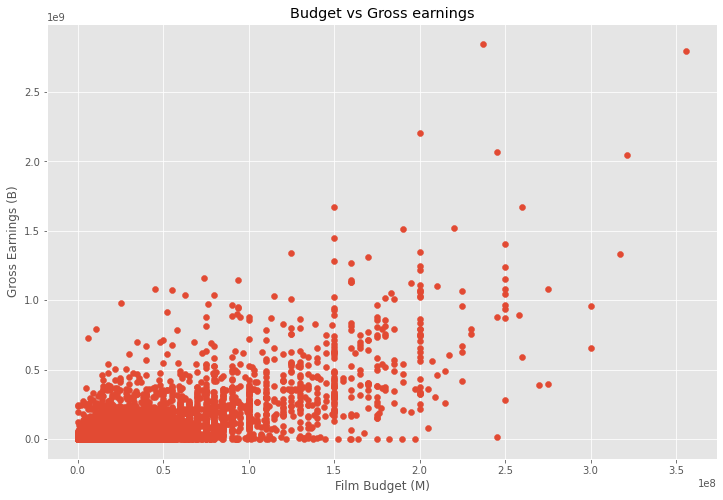

In [27]:
#Scatter plot budget vs gross revenue

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross earnings')
plt.xlabel('Film Budget (M)')
plt.ylabel('Gross Earnings (B)')
plt.show()

In [28]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [29]:
# Let's start looking at correlation
df.corr(method='pearson') #Pearson, Kendall, Spearman

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.098013,0.222573,0.351959,0.259202,0.120662,0.997416
score,0.098013,1.000000,0.409157,0.082064,0.185856,0.399407,0.105835
votes,0.222573,0.409157,1.000000,0.449015,0.631264,0.309151,0.218059
budget,0.351959,0.082064,0.449015,1.000000,0.705322,0.271486,0.345052
gross,0.259202,0.185856,0.631264,0.705322,1.000000,0.243594,0.252297
runtime,0.120662,0.399407,0.309151,0.271486,0.243594,1.000000,0.120490
yearcorrect,0.997416,0.105835,0.218059,0.345052,0.252297,0.120490,1.000000


In [30]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype ==  'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,2009
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,2019
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,1997
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,2015
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3360,6,4,2000,1119,6.5,5200.0,730,1123,2319,54,22500000,1400,477,103.0,2001
7625,6720,6,4,2019,1149,5.7,320.0,2546,2565,1915,55,69133333,790,2308,104.0,2019
7580,4664,3,5,2019,1835,5.2,735.0,1445,2203,2278,55,17250000,682,1992,93.0,2020
2417,3406,6,6,1993,85,7.3,5100.0,33,1718,2563,27,11900000,596,796,134.0,1993


In [31]:
df= pd.read_csv('E:\portfolio projects\Project 5 Python Movie Data analysis\movies2.csv', index_col=0)
df = df.reindex(sorted(df.columns), axis=1)
pd.set_option('display.max_rows',20)
df.sort_values(by=['gross'], inplace=False, ascending=False)
df['company'].drop_duplicates().sort_values(ascending=False)
df.drop_duplicates()
df=df.sort_values(by=['gross'], inplace=False, ascending=False)

In [32]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
5445,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,"December 18, 2009 (United States)",162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009,2009
7445,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,"April 26, 2019 (United States)",181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019,2019
3045,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,"December 19, 1997 (United States)",194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997,1997
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015 (United States)",138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,22500000,British Broadcasting Corporation (BBC),United Kingdom,Dominic Anciano,Comedy,1400,"Love, Honor and Obey",R,"February 9, 2001 (United States)",103.0,6.5,Sadie Frost,5200.0,Dominic Anciano,2000,2001
7625,69133333,Visual Arts Entertainment,United States,Shane Stanley,Comedy,790,The Untold Story,R,"January 11, 2019 (United States)",104.0,5.7,Miko Hughes,320.0,Lee Stanley,2019,2019
7580,17250000,Roxwell Films,United States,John Swab,Crime,682,Run with the Hunted,Not Rated,"June 26, 2020 (United States)",93.0,5.2,Ron Perlman,735.0,John Swab,2019,2020
2417,11900000,DENTSU Music And Entertainment,Japan,Akira Kurosawa,Drama,596,Madadayo,R,"April 17, 1993 (Japan)",134.0,7.3,Tatsuo Matsumura,5100.0,Ishirô Honda,1993,1993


In [33]:
df_numerized = df_numerized.reindex(sorted(df.columns), axis=1)
df_numerized.corr(method='pearson')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
budget,1.000000,0.147092,0.051141,-0.004015,-0.311171,0.705322,0.019360,-0.131036,0.011666,0.271486,0.082064,-0.019881,0.449015,-0.021299,0.351959,0.345052
company,0.147092,1.000000,0.093199,0.004536,-0.070347,0.154440,0.009980,-0.081546,-0.009826,0.033641,-0.000964,0.010243,0.132535,0.004274,-0.009918,-0.015122
country,0.051141,0.093199,1.000000,0.017926,-0.035896,0.092204,-0.010425,0.026930,-0.021951,-0.079305,-0.134557,-0.014983,0.073522,0.014650,-0.069423,-0.079986
director,-0.004015,0.004536,0.017926,1.000000,-0.015258,-0.014332,0.009079,0.016255,-0.001547,0.017611,0.009540,0.039834,0.000316,0.299463,-0.020795,-0.020432
genre,-0.311171,-0.070347,-0.035896,-0.015258,1.000000,-0.230974,0.016355,0.123465,0.030186,-0.052719,0.027965,-0.004696,-0.145291,0.006434,-0.081261,-0.077751
gross,0.705322,0.154440,0.092204,-0.014332,-0.230974,1.000000,0.006708,-0.131063,0.000563,0.243594,0.185856,-0.001122,0.631264,-0.022753,0.259202,0.252297
name,0.019360,0.009980,-0.010425,0.009079,0.016355,0.006708,1.000000,-0.012441,-0.010758,0.010335,0.017105,0.006820,0.013056,0.009033,0.011453,0.010900
rating,-0.131036,-0.081546,0.026930,0.016255,0.123465,-0.131063,-0.012441,1.000000,0.023783,0.066597,0.013276,0.005370,0.012286,-0.004465,0.027931,0.028408
released,0.011666,-0.009826,-0.021951,-0.001547,0.030186,0.000563,-0.010758,0.023783,1.000000,0.000911,0.042542,0.015067,0.016001,-0.002683,-0.000307,-0.004639
runtime,0.271486,0.033641,-0.079305,0.017611,-0.052719,0.243594,0.010335,0.066597,0.000911,1.000000,0.399407,0.009021,0.309151,-0.003499,0.120662,0.120490


In [34]:
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
5445,237000000,2253,55,1155,0,2847246203,533,5,696,162.0,7.8,2334,1100000.0,1778,2009,2009
7445,356000000,1606,55,162,0,2797501328,535,5,183,181.0,8.4,2241,903000.0,743,2019,2019
3045,200000000,2253,55,1155,6,2201647264,6896,5,704,194.0,7.8,1595,1100000.0,1778,1997,1997
6663,245000000,1540,55,1125,0,2069521700,5144,5,698,138.0,7.8,524,876000.0,2550,2015,2015
7244,321000000,1606,55,162,0,2048359754,536,5,192,149.0,8.4,2241,897000.0,743,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,22500000,477,54,730,4,1400,3360,6,1119,103.0,6.5,2319,5200.0,1123,2000,2001
7625,69133333,2308,55,2546,4,790,6720,6,1149,104.0,5.7,1915,320.0,2565,2019,2019
7580,17250000,1992,55,1445,5,682,4664,3,1835,93.0,5.2,2278,735.0,2203,2019,2020
2417,11900000,796,27,33,6,596,3406,6,85,134.0,7.3,2563,5100.0,1718,1993,1993


In [35]:
correlation_mat = df_numerized.corr(method='pearson')
corr_pairs =  correlation_mat.unstack()
pd.set_option('display.max_rows',20)
corr_pairs


budget       budget         1.000000
             company        0.147092
             country        0.051141
             director      -0.004015
             genre         -0.311171
                              ...   
yearcorrect  star          -0.028231
             votes          0.218059
             writer        -0.008291
             year           0.997416
             yearcorrect    1.000000
Length: 256, dtype: float64

In [36]:
pd.set_option('display.max_rows',None)
sorted_pairs =  corr_pairs.sort_values()
sorted_pairs


budget       genre         -0.311171
genre        budget        -0.311171
gross        genre         -0.230974
genre        gross         -0.230974
votes        genre         -0.145291
genre        votes         -0.145291
score        country       -0.134557
country      score         -0.134557
rating       gross         -0.131063
gross        rating        -0.131063
rating       budget        -0.131036
budget       rating        -0.131036
company      rating        -0.081546
rating       company       -0.081546
genre        year          -0.081261
year         genre         -0.081261
country      yearcorrect   -0.079986
yearcorrect  country       -0.079986
country      runtime       -0.079305
runtime      country       -0.079305
genre        yearcorrect   -0.077751
yearcorrect  genre         -0.077751
company      genre         -0.070347
genre        company       -0.070347
year         country       -0.069423
country      year          -0.069423
runtime      genre         -0.052719
g

In [37]:
pd.set_option('display.max_rows',None)
high_corr =  sorted_pairs[(sorted_pairs)>0.4]
high_corr

score        votes          0.409157
votes        score          0.409157
budget       votes          0.449015
votes        budget         0.449015
gross        votes          0.631264
votes        gross          0.631264
budget       gross          0.705322
gross        budget         0.705322
yearcorrect  year           0.997416
year         yearcorrect    0.997416
budget       budget         1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [38]:
# Looking at the top 15 compaies by gross revenue
pd.set_option('display.max_rows',20)
CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56503630954
Universal Pictures           52518308519
Columbia Pictures            43008941346
Paramount Pictures           40497860010
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9231782143
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7664892571
Name: gross, dtype: int64

In [39]:
pd.set_option('display.max_rows',20)
df.groupby(['company', 'yearcorrect'])[["gross"]].sum().sort_values('yearcorrect', ascending=False)

,,gross
company,yearcorrect,
Cactus Blue Entertainment,2020,13266
"""Weathering With You"" Film Partners",2020,193457467
Dreamworks Pictures,2020,384623579
Lilies Films,2020,10123353
Beijing Enlight Pictures,2020,240663149
...,...,...
Broadway Productions,1980,2261507
Universal Pictures,1980,369777224
The Jerry Gross Organization,1980,15189431


In [40]:
CompanyGrossSum = df.groupby(['company', 'yearcorrect'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','yearcorrect'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                yearcorrect
Walt Disney Pictures   2019           5773131804
Marvel Studios         2018           4018631866
Universal Pictures     2015           3834354888
Twentieth Century Fox  2009           3793491246
Walt Disney Pictures   2017           3789382071
Paramount Pictures     2011           3565705182
Warner Bros.           2010           3300479986
                       2011           3168551343
Walt Disney Pictures   2010           3104474158
Paramount Pictures     2014           3071298586
Columbia Pictures      2019           2932757449
                       2006           2918469353
Marvel Studios         2019           2797501328
Warner Bros.           2018           2774168962
                       2005           2773019821
Name: gross, dtype: int64

In [41]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56503630954
Universal Pictures           52518308519
Columbia Pictures            43008941346
Paramount Pictures           40497860010
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9231782143
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7664892571
Name: gross, dtype: int64

In [42]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted


company
Warner Bros.                 56503630954
Universal Pictures           52518308519
Columbia Pictures            43008941346
Paramount Pictures           40497860010
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9231782143
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7664892571
Name: gross, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

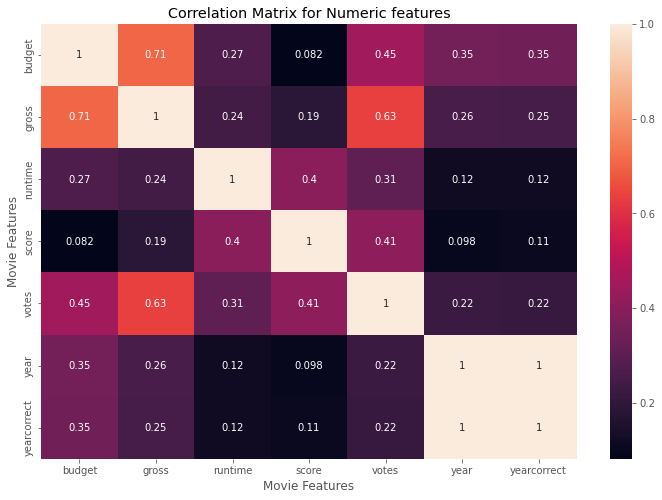

In [43]:
#High correlation between between bugdet and gross observed
#Visualizing correlation using df

correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features') 
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

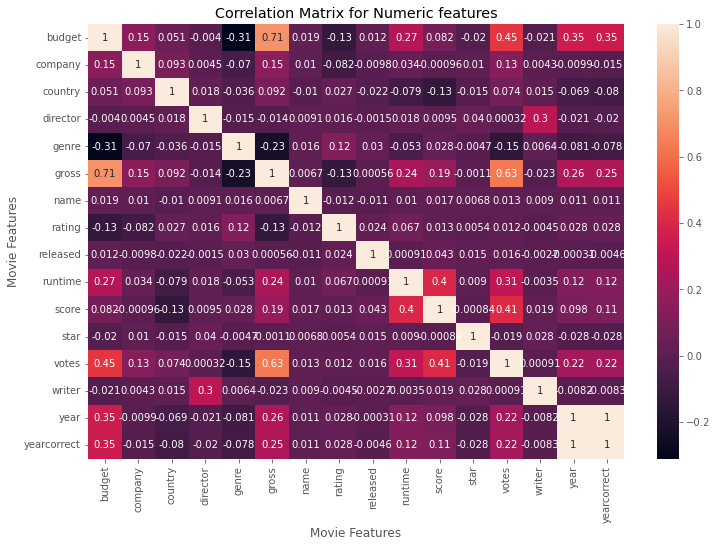

In [44]:
#High correlation between between bugdet and gross observed
#Visualizing correlation usind df_numerized

correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features') 
plt.show

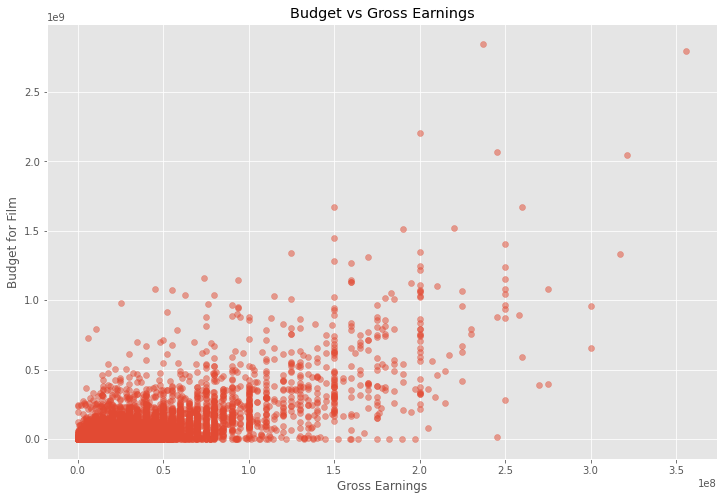

In [45]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

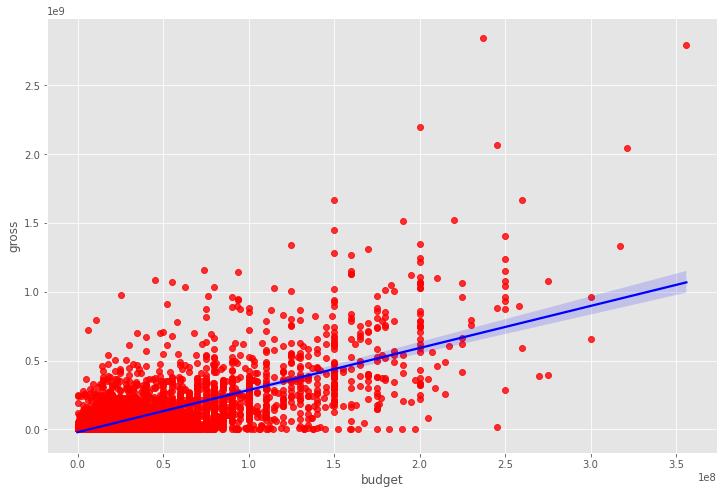

In [46]:

sns.regplot(x='budget' , y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

#Insight 1 

# Budget has the highest correlation to gross earnings
# Company does not have a high correlation to gross earnings

<AxesSubplot:xlabel='rating', ylabel='gross'>

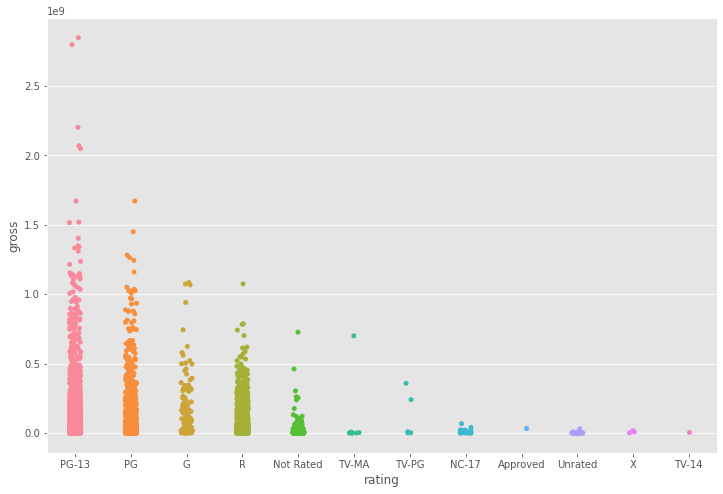

In [47]:
#Analysing Ratings vs Gross collections
sns.stripplot(x="rating", y="gross", data=df)

In [48]:
RatingGrossSum = df.groupby(['rating'])[['gross']].sum()
                                                
RatingGrossSumSorted = RatingGrossSum.sort_values(['gross'], ascending = False)[:15]

RatingGrossSumSorted = RatingGrossSumSorted['gross'].astype('int64') 

RatingGrossSum = RatingGrossSum.sort_values(by=['gross'], ascending=False)

RatingGrossSum

,gross
rating,
PG-13,274004194629
R,157822269967
PG,130790989841
G,21606120903
Not Rated,5484343683
TV-MA,712537041
TV-PG,610858458
NC-17,247554585
Unrated,127574125


In [49]:
RatingGrossSum["cumpercentage"] = RatingGrossSum["gross"].cumsum()/df["gross"].sum()* 100

RatingGrossSum

,gross,cumpercentage
rating,,
PG-13,274004194629,46.325636
R,157822269967,73.008501
PG,130790989841,95.121213
G,21606120903,98.774140
Not Rated,5484343683,99.701373
TV-MA,712537041,99.821841
TV-PG,610858458,99.925118
NC-17,247554585,99.966972
Unrated,127574125,99.988541


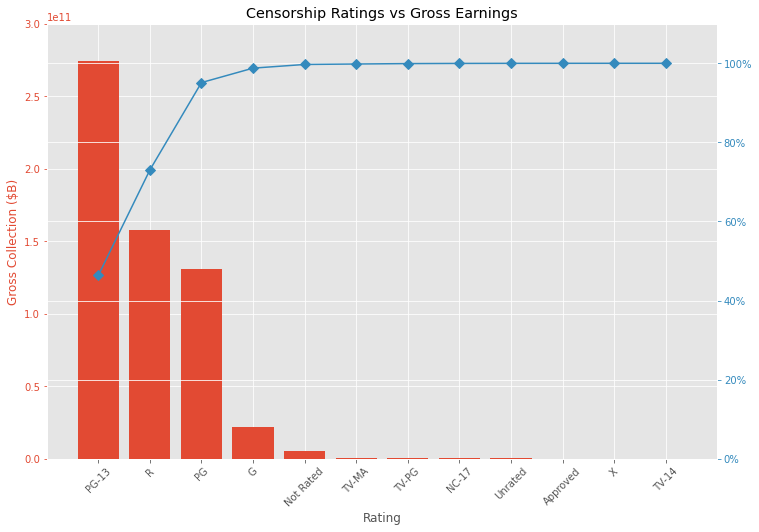

In [50]:
fig, ax1 = plt.subplots()
ax1.bar(RatingGrossSum.index, RatingGrossSum["gross"], color="C0")
ax1.set_ylabel("Gross Collection ($B)", color="C0")
ax1.tick_params(axis="y", colors="C0")
ax1.set_xlabel("Rating")
ax1.set_xticklabels(RatingGrossSum["gross"], rotation=45)
plt.ylim(0,3e+11)
ax2 = ax1.twinx()
ax2.plot(RatingGrossSum.index, RatingGrossSum["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.tick_params(axis="y", colors="C1")
plt.ylim(0,110)
plt.title('Censorship Ratings vs Gross Earnings')
plt.show()

#Insight 2
#Movies rated PG/PG13 are expected to do higher gross collections as compared to other ratings (Pareto Analysis)
